In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [5]:
# 데이터 준비

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

mpg_df = pd.read_csv('drive/MyDrive/Colab Notebooks/data-files/auto-mpg.data', names=columns,
                     sep=" ", na_values="?", comment="\t", skipinitialspace=True)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
# 데이터 준비 2
# 1. mpg 컬럼을 y로 나머지 컬럼을 x로 분할
# 2. origin 컬럼을 one-hot-encoding 처리
# 3. 회귀모델 만들기 : mpg(y)를 예측하는 회귀모델
# 4. 훈련데이터 평가

In [7]:
# 데이터 준비 2-1
mpg_df.dropna(inplace=True)
y = mpg_df['mpg'].values
X = mpg_df.drop('mpg', axis=1)

X.shape, y.shape

((392, 7), (392,))

In [8]:
# 데이터 준비 2-2

ohe_orgin = pd.get_dummies(X['origin']).astype(int)
X = pd.concat([X.drop('origin', axis=1), ohe_orgin], axis=1)
X.rename(columns={1: "USA", 2: "Europe", 3: "Japan"}, inplace=True)

# X.head()

# X = X.values

In [9]:
# 데이터 준비 2-3

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [10]:
X.min(axis=0), X.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [11]:
X.shape

(392, 9)

In [12]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [13]:
# 모델 훈련 설계

model.compile(loss="mse",
              # optimizer="adam",
              optimizer=tf_keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [14]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 494.8903 - mae: 21.2122 - val_loss: 1038.9052 - val_mae: 31.6582
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 480.7950 - mae: 20.9485 - val_loss: 1017.9974 - val_mae: 31.3207
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 462.5351 - mae: 20.4086 - val_loss: 994.2852 - val_mae: 30.9344
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 459.2041 - mae: 20.3201 - val_loss: 960.9668 - val_mae: 30.3770
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 427.8288 - mae: 19.4969 - val_loss: 914.6223 - val_mae: 29.5841
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 396.2606 - mae: 18.5327 - val_loss: 850.5001 - val_mae: 28.4539
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 368.9199 - mae: 17.5737 - val_loss: 766.5449 - val_mae: 26.9023
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 318.9636 - mae: 16.1173 - val_loss: 661.8437 - val_mae: 24.8295
Epoch

In [15]:
print( model.evaluate(X, y)[1],  y.mean() )
print( model.evaluate(X, y)[1] / y.mean() )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4001 - mae: 1.3026 
1.6882127523422241 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4001 - mae: 1.3026 
0.07200454790857726


In [16]:
print( fit_history.history.keys() )
print( np.min(fit_history.history['loss']) )
print( np.min(fit_history.history['mae']) )

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
3.133420467376709
1.3182787895202637


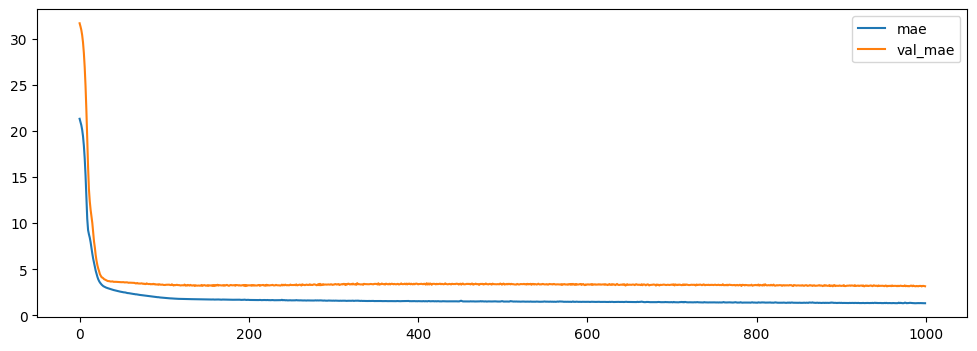

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(fit_history.epoch, fit_history.history['mae'], label="mae")
plt.plot(fit_history.epoch, fit_history.history['val_mae'], label="val_mae")
plt.legend()
plt.show()

In [18]:
model1 = tf_keras.models.Sequential()
model1.add(tf_keras.layers.Input(shape=(9,)))
model1.add(tf_keras.layers.Dense(64, activation='relu', kernel_initializer="he_uniform"))
model1.add(tf_keras.layers.Dense(32, activation='relu', kernel_initializer=tf_keras.initializers.HeUniform(seed=42)))
model1.add(tf_keras.layers.Dense(1))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 모델 구조 설계 3 : 배치 정규화

model2 = tf_keras.models.Sequential()
model2.add(tf_keras.layers.Input(shape=(9,)))
model2.add(tf_keras.layers.Dense(64))
model2.add(tf_keras.layers.BatchNormalization())
model2.add(tf_keras.layers.Activation('relu'))

model2.add(tf_keras.layers.Dense(32))
model2.add(tf_keras.layers.BatchNormalization())
model2.add(tf_keras.layers.Activation('relu'))

model2.add(tf_keras.layers.Dense(1))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 192 (768.00 B)

In [20]:
# 모델 구조 설계 4 : 기중치 규제 (L1.)

model3 = tf_keras.models.Sequential()
model3.add(tf_keras.layers.Input(shape=(9,)))
model3.add(tf_keras.layers.Dense(64, activation='relu', kernel_regularizer=tf_keras.regularizers.L2(0.1)))
model3.add(tf_keras.layers.Dense(32, activation='relu', kernel_regularizer=tf_keras.regularizers.L2(0.1)))
model3.add(tf_keras.layers.Dense(1))

model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 모델 구조 설계 5 : 드롭아웃 적용

model4 = tf_keras.models.Sequential()
model4.add(tf_keras.layers.Input(shape=(9,)))
model4.add(tf_keras.layers.Dense(64, activation='relu'))
model4.add(tf_keras.layers.Dropout(0.5, seed=42))
model4.add(tf_keras.layers.Dense(32, activation='relu'))
model4.add(tf_keras.layers.Dropout(0.5, seed=42))
model4.add(tf_keras.layers.Dense(1))

model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 모델 훈련 설계

model.compile( loss='mse',
               optimizer='adam',
               metrics=['mae'])
model1.compile(loss='mse',
               optimizer='adam',
               metrics=['mae'])
model2.compile(loss='mse',
               optimizer='adam',
               metrics=['mae'])
model3.compile(loss='mse',
               optimizer='adam',
               metrics=['mae'])
model4.compile(loss='mse',
               optimizer='adam',
               metrics=['mae'])

In [25]:
fit_history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
fit_history_1 = model1.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
fit_history_2 = model2.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
fit_history_3 = model3.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
fit_history_4 = model4.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.2597 - mae: 1.3699 - val_loss: 17.1134 - val_mae: 3.1756
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9380 - mae: 1.3101 - val_loss: 17.1121 - val_mae: 3.1961
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7460 - mae: 1.2630 - val_loss: 17.2280 - val_mae: 3.2003
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9225 - mae: 1.4404 - val_loss: 17.1310 - val_mae: 3.1915
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9137 - mae: 1.2906 - val_loss: 17.2708 - val_mae: 3.2063
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1391 - mae: 1.3213 - val_loss: 17.1110 - val_mae: 3.1966
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0500 - mae: 1.3205 - val_loss: 17.1088 - val_mae: 3.1857
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3092 - mae: 1.3684 - val_loss: 17.2160 - val_mae: 3.1996
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

In [27]:
print( np.min(fit_history.history['loss']), np.min(fit_history.history['mae']) )
print( np.min(fit_history_1.history['loss']), np.min(fit_history_1.history['mae']) )
print( np.min(fit_history_2.history['loss']), np.min(fit_history_2.history['mae']) )
print( np.min(fit_history_3.history['loss']), np.min(fit_history_3.history['mae']) )
print( np.min(fit_history_4.history['loss']), np.min(fit_history_4.history['mae']) )


3.0391957759857178 1.3000985383987427
5.6423821449279785 1.7744271755218506
4.2502360343933105 1.5598423480987549
12.330885887145996 1.9898040294647217
41.27611541748047 4.836435317993164
